In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import csv

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# CHANGE THIS PARAMETER
which = 'mEGFP' #mEGFP or Halo

# Load the appropriate data
if which == 'mEGFP':
    data = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Publication Figures\\Supplementary Figures\\Rtn4-mEGFP_Western_Blotting\\20210520_U2OS_Rtn4-mEGFP_CRISPR_Blot2_anti-Rtn4_1min_lineplot.csv"
    savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\Bewersdorf_Lab\\Publication Figures\\Supplementary Figures\\Rtn4-mEGFP_Western_Blotting"
    ver = 'mEGFP_V1'
    peak_dist = 50
elif which == 'Halo':
    data = "C:\\Users\\laf62\\Desktop\\LAF-Drive\Yale_University\\Bewersdorf_Lab\\Publication Figures\\Supplementary Figures\\Rtn4-Halo_images\\20191008_westernRtn4-Halo_anti-nogonew_30sec_SUCCESS_lineplot.csv"
    savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Publication Figures\\Supplementary Figures\\Rtn4-Halo_images"
    ver = 'Halo_V1'
    peak_dist = 70

else:
    print('Please change the which variable to either mEGFP or Halo')

read_csv = pd.read_csv(data)
read_csv = np.array(read_csv)

In [17]:
# Find peaks
from scipy.signal import find_peaks
#find_peaks searches for local maxima. Distance sets the number of datapoints that must
#be between found peaks
peaks = find_peaks(read_csv[:,1],distance=peak_dist)
peaks_g = read_csv[:,1][peaks[0]]
peaks_dist = read_csv[:,0][peaks[0]]
minim = np.min(read_csv[:,1])
twopeaks = len(peaks)==2
if twopeaks:
    max1 = np.around(np.max(peaks_g)-minim,decimals=0)
    max2 = np.around(np.min(peaks_g)-minim,decimals=0)
    total = max1+max2
    peak1 = int(np.around(max1/total,2)*100)
    peak2 = int(np.around(max2/total,2)*100)
peaks

(array([ 24, 113], dtype=int64), {})

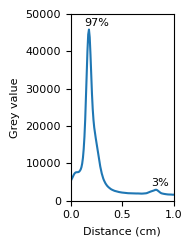

In [19]:
if which == 'mEGFP':
    plt.rcParams.update({'font.size': 8}) #32
    plt.rcParams.update({'legend.frameon': False})
    fig = plt.figure(figsize=[2,2.5])
    plt.plot(read_csv[:,0],read_csv[:,1])
    plt.xlim(0,1)
    plt.ylim(0,50000)
    plt.xlabel('Distance (cm)')
    plt.ylabel('Grey value')
    plt.text(peaks_dist[0]-0.05,max1+2500,str(peak1)+'%')#,color=CB_color_cycle[color[1]], fontsize='large')
    plt.text(peaks_dist[1]-0.05,max2+2500,str(peak2)+'%')
    fig.tight_layout()
    mEGFP_save = savedir + '\\Rtn4-mEGFP_line_plot.png'
    plt.savefig(mEGFP_save, dpi=600, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches="tight", pad_inches=0.1, metadata=None)
    plt.show()
elif which == 'Halo':
    plt.rcParams.update({'font.size': 8}) #32
    plt.rcParams.update({'legend.frameon': False})
    fig = plt.figure(figsize=[2,2.5])
    plt.plot(read_csv[:,0],read_csv[:,1])
    plt.xlim(0,1.25)
    plt.ylim(0,50000)
    plt.xlabel('Distance (cm)')
    plt.ylabel('Grey value')
    plt.text(peaks_dist[0]-0.1,max1+4500,str(peak1)+'%')#,color=CB_color_cycle[color[1]], fontsize='large')
    plt.text(peaks_dist[1]-0.1,max2+4500,str(peak2)+'%')
    fig.tight_layout()
    Halo_save = savedir + '\\Rtn4-Halo_line_plot.png'
    plt.savefig(Halo_save, dpi=600, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches="tight", pad_inches=0.1, metadata=None)
    plt.show()
else:
    print('Please change the which variable to either mEGFP or Halo')